In [1100]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Loading the data

In [1101]:
housing = pd.read_csv("Zameen Property Data.csv")
housing.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director


In [1102]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
dtypes: float64(2), int64(5), obje

Saving figure bad_visualization_plot


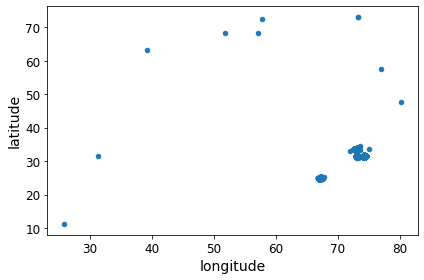

In [1103]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

# Cleaning the data


In [1104]:
housing.shape

(168446, 17)

In [1105]:
housing.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent'],
      dtype='object')

In [1106]:
housing['purpose'].unique()


array(['For Sale', 'For Rent'], dtype=object)

In [1107]:
housing['purpose'].value_counts()

For Sale    120655
For Rent     47791
Name: purpose, dtype: int64

In [1108]:
housing = housing.drop(['location_id', 'page_url','date_added', 'agency', 'agent'],axis='columns')

In [1109]:
housing.shape

(168446, 12)

In [1110]:
housing.isnull().sum()

property_id      0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
dtype: int64

In [1111]:
housing1 = housing[housing['purpose'] != 'For Rent']

In [1112]:
housing1.head()

,property_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms
0,237062,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2
1,346905,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3
2,386513,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5
3,656161,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4
4,841645,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3


In [1113]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing1, test_size=0.2, random_state=42)

In [1114]:
test_set.head()

,property_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms
134871,17140990,House,12500000,Korangi,Karachi,Sindh,24.827042,67.105828,9,3.4 Marla,For Sale,6
113473,17013592,House,10500000,Bahria Town,Lahore,Punjab,31.375514,74.172735,3,5 Marla,For Sale,3
67837,16123116,House,27500000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.549693,73.130536,6,10 Marla,For Sale,5
19938,12698314,Flat,8000000,Bahria Town,Islamabad,Islamabad Capital,33.550837,73.106289,2,4.2 Marla,For Sale,2
71646,16261341,House,49500000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,10,1 Kanal,For Sale,8


In [1115]:
pd.options.mode.chained_assignment = None  # default='warn'
housing1['price'] = housing1['price'].div(1000000)


In [1116]:
housing1.head()


,property_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms
0,237062,Flat,10.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2
1,346905,Flat,6.9,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3
2,386513,House,16.5,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5
3,656161,House,43.5,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4
4,841645,House,7.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3


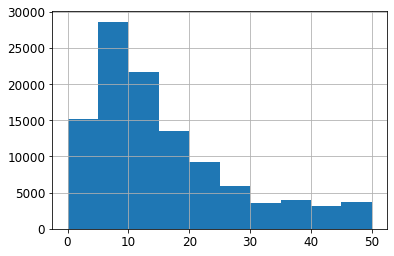

In [1117]:
housing1["price"].hist(range=[0, 50])


In [1118]:
housing1["price_cat"] = pd.cut(housing1["price"],
                               bins=[0., 10, 20, 30, 40, 50, np.inf],
                               labels=[1, 2, 3, 4, 5,6])

In [1119]:
housing1["price_cat"].value_counts()


1    45577
2    35107
3    14354
6    12347
4     7480
5     5788
Name: price_cat, dtype: int64

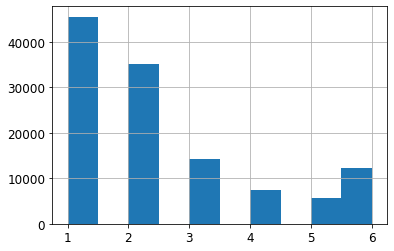

In [1120]:
housing1["price_cat"].hist()

In [1121]:
housing1.price.describe()


count    120655.000000
mean         24.765128
std          39.597536
min           0.000000
25%           7.400000
50%          13.500000
75%          26.000000
max        2000.000000
Name: price, dtype: float64

In [1122]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price <=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
housing1 = remove_pps_outliers(housing1)

In [1123]:
housing1.price.describe()

count    111701.000000
mean         16.925216
std          13.984183
min           0.000000
25%           7.000000
50%          12.500000
75%          22.000000
max          80.000000
Name: price, dtype: float64

In [1124]:
housing1 = housing1.dropna()

housing1.isnull().sum()

property_id      0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
price_cat        0
dtype: int64

In [1125]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
X = housing1
X = np.array(X)
Y = housing1['price_cat']
Y = np.array(Y)


split = StratifiedShuffleSplit(n_splits=6, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X,Y):
    strat_train_set = X[train_index]
    strat_test_set = X[test_index]
    


In [1126]:
housing1["price_cat"].value_counts() / len(housing1)

1    0.408034
2    0.314300
3    0.128506
4    0.062740
5    0.047906
6    0.038514
Name: price_cat, dtype: float64

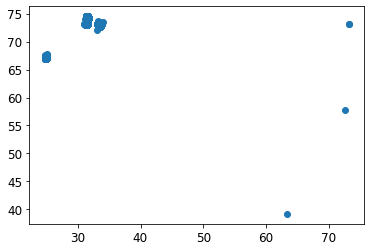

In [1129]:
df = pd.DataFrame(strat_train_set)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(df[6],df[7])

plt.show()
